# Unsupervised Learning: Trade&Ahead

**Context**

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

**Objective**

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group

**Data Dictionary**

* Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
* Company: Name of the company
* GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification
* Standard (GICS) that best defines its business operations
* GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry
* Classification Standard (GICS) that best defines its business operations
* Current Price: Current stock price in dollars
* Price Change: Percentage change in the stock price in 13 weeks
* Volatility: Standard deviation of the stock price over the past 13 weeks
* ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
* Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
* Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
* Net Income: Revenues minus expenses, interest, and taxes (in dollars)
* Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
* Estimated Shares Outstanding: Company's stock currently held by all its shareholders
* P/E Ratio: Ratio of the company's current stock price to the earnings per share
* P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

# Importing necessary libraries and data

In [ ]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale (important in clustering)
from sklearn.preprocessing import StandardScaler

#---------------------------------------------------------------------
# to compute distances for the centroid methodology (KMeans)
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#----------------------------------------------------------------------
# to compute distances for the hierarchical clustering
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

#----------------------------------------------------------------------
# good practice
%matplotlib inline

# to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#--------------------------------
df = pd.read_csv('/content/drive/My Drive/PGBA/Model 7 Unsupervised Learning/Datasets/stock_data.csv')

Mounted at /content/drive/


# Data Overview

In [ ]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
df.shape

(340, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


### **Overview:**
#### 1 the dataset consists of 340 rows and 15 columns
#### 2 the dataset has 4 objects and the rest are numerical
#### 3 the dataset does not have any nulls
#### 4 the dataset does not have any duplicates
#### 5 the most popular sector is industrial, and subsector is oil & gas
#### 6 the distribution of current price seems to be skewed
#### 7 the distributions of ROE & Cash ratio seem to be skewed
#### 8 the distributions of Net cash flow & Net income seem to be skewed

In [ ]:
# drop Security as we have the ticker
df.drop('Security',axis=1,inplace=True)

In [ ]:
# convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

# Exploratory Data Analysis (EDA)

## 1 Univariate Analysis

In [ ]:
# function to visuaize histogram and boxplot for numerical attributes

def histogram_boxplot(data, feature, figsize=(12, 7), kde=True,bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

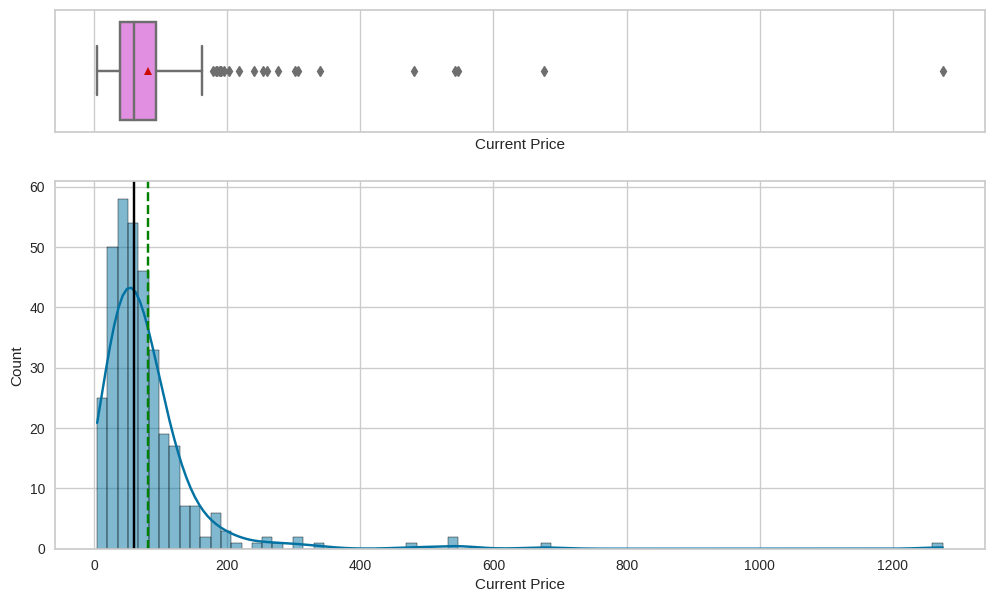

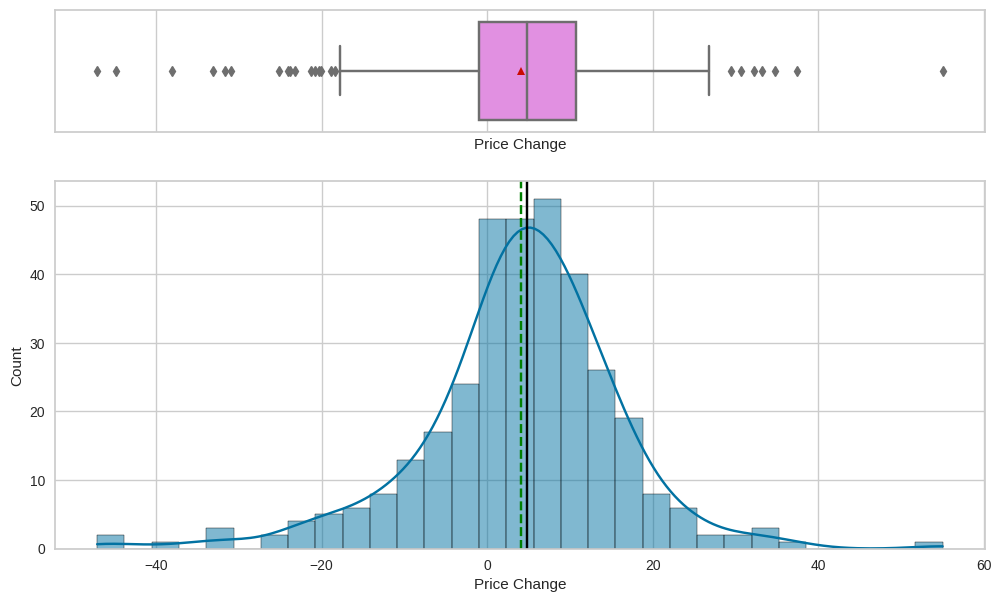

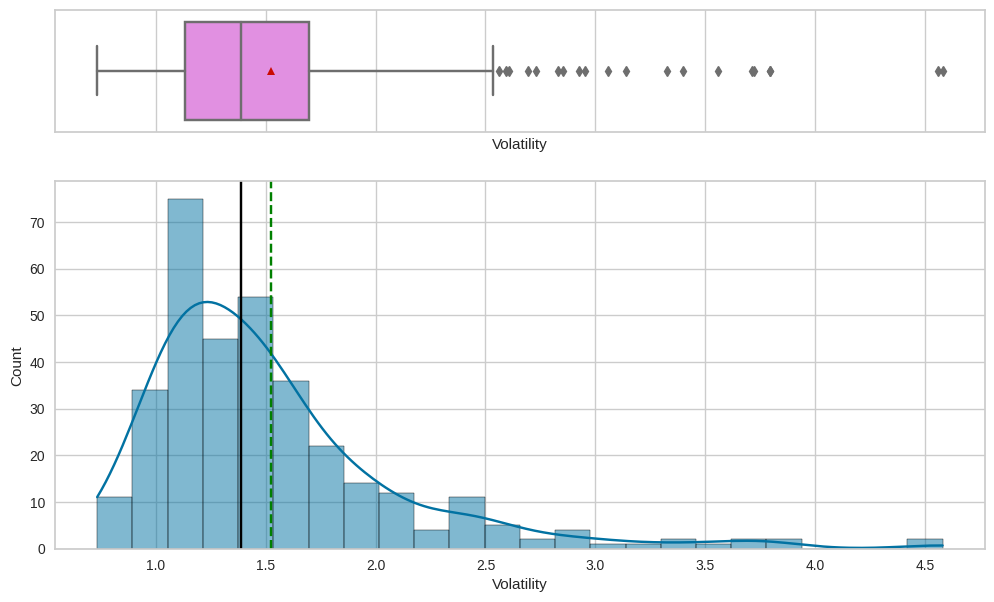

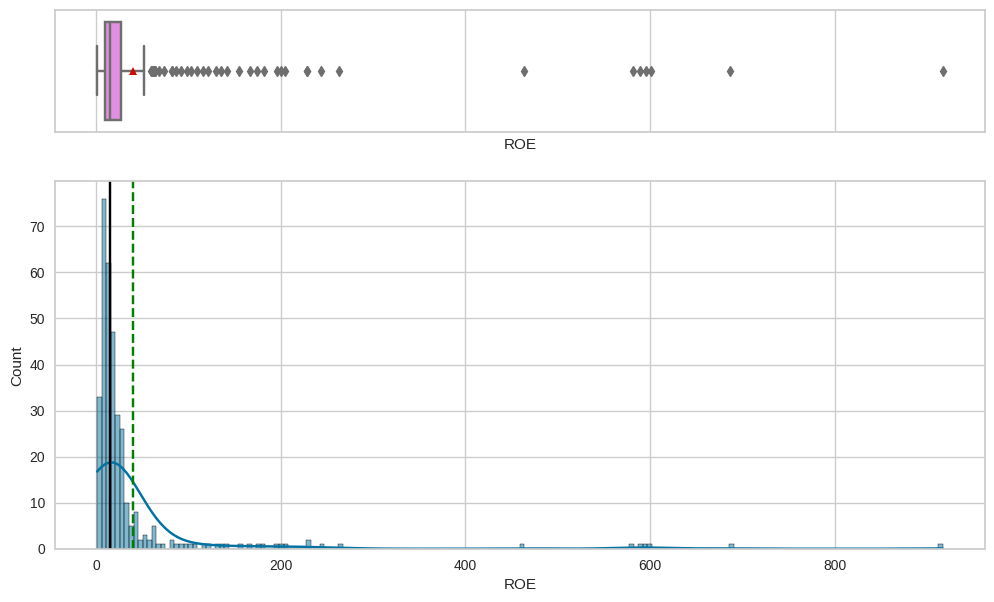

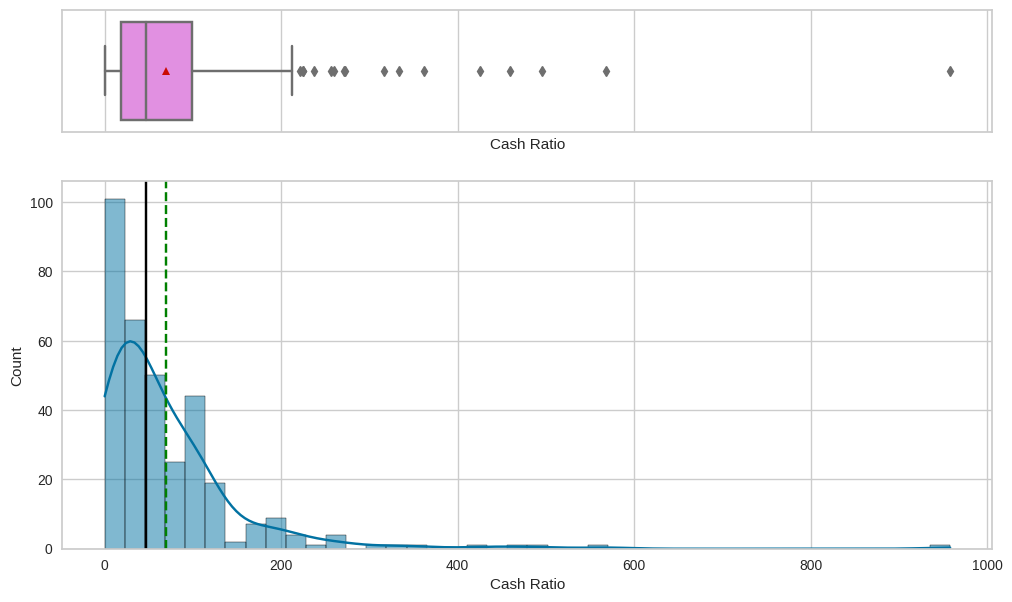

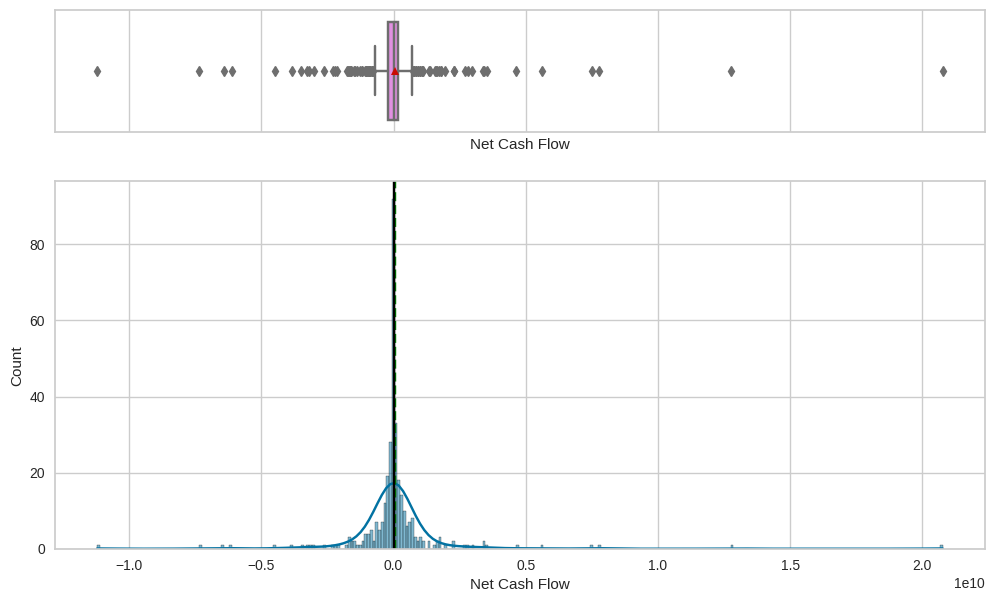

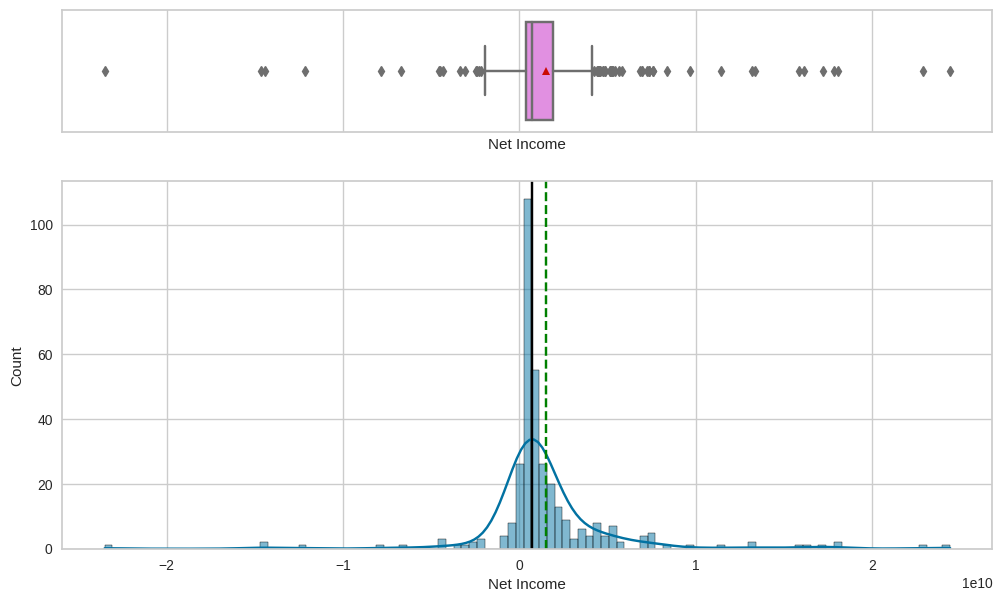

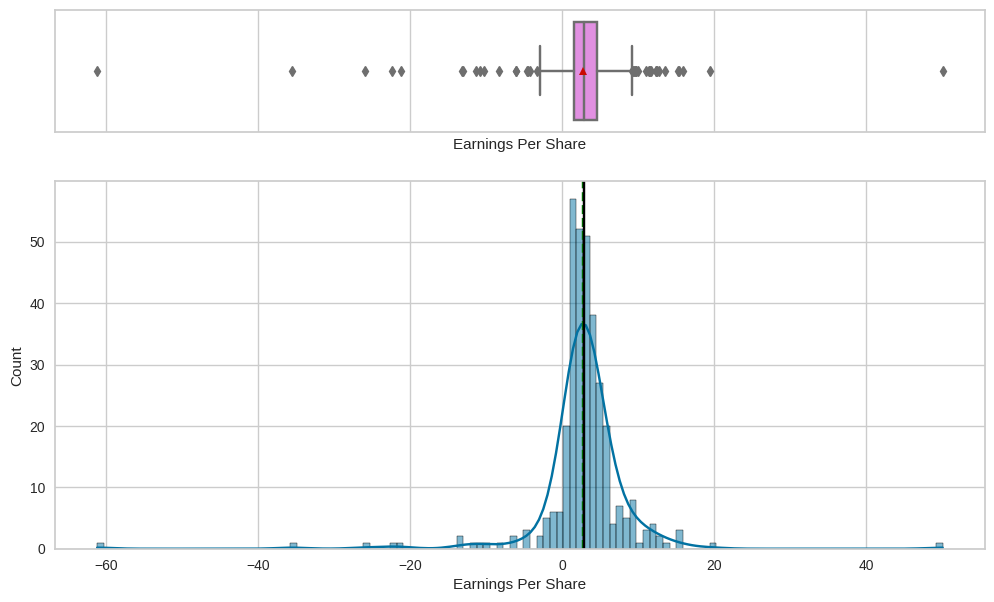

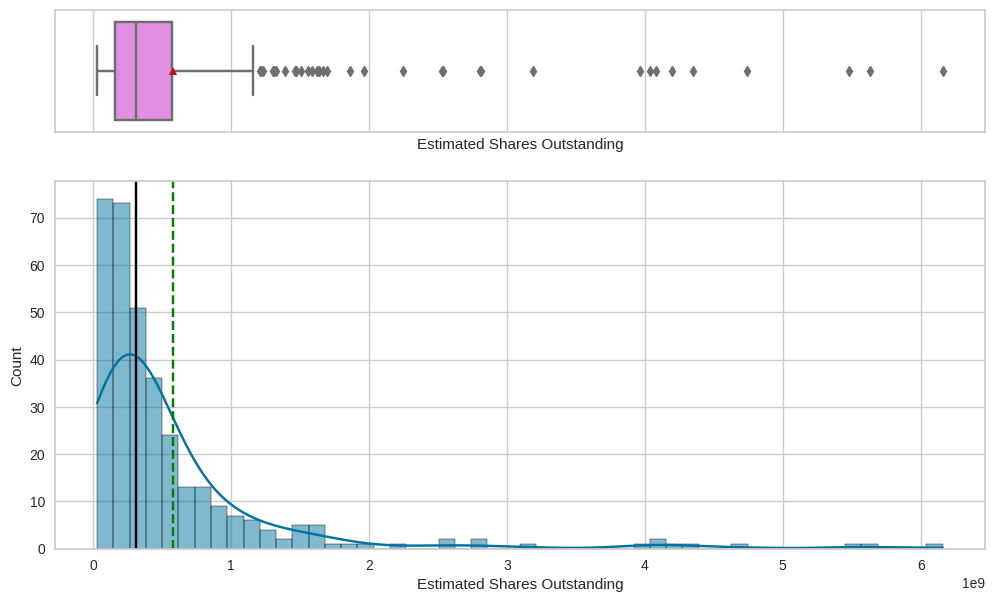

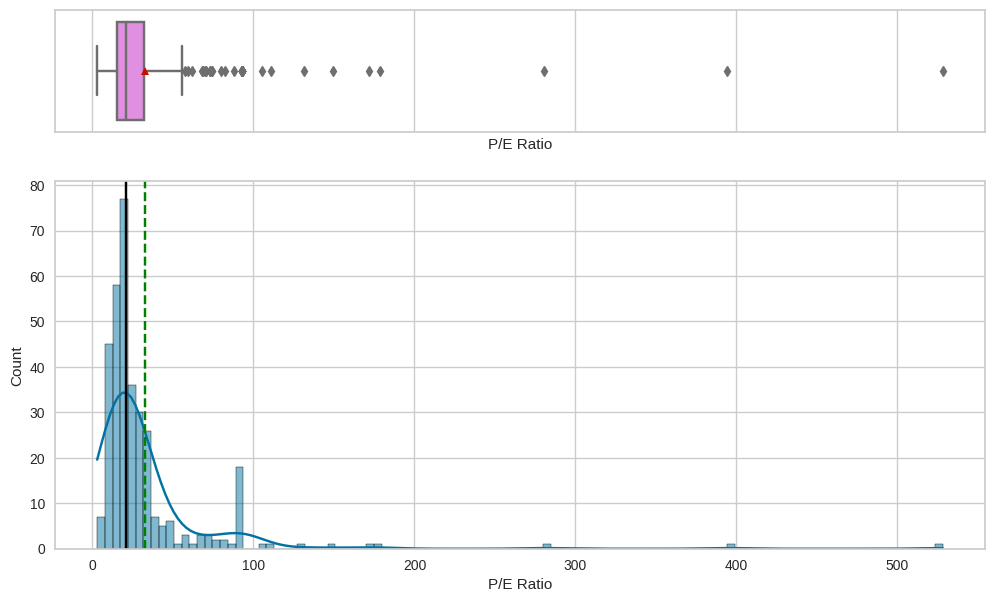

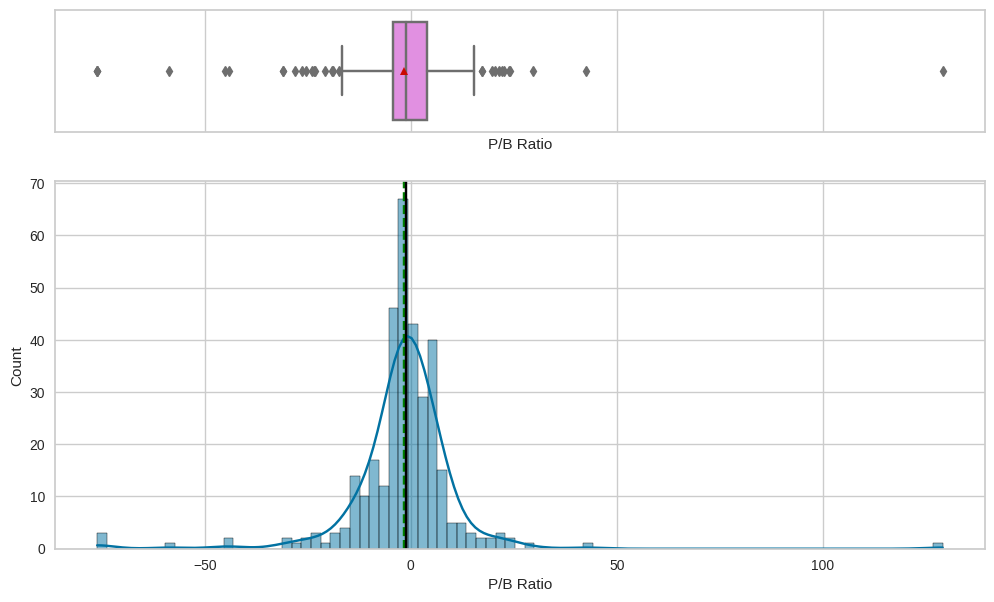

In [ ]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

### **Overview:**

#### 1 Current price differs between companies, and it is usually an unpreferable measure for comparison. This variable is good for distinguishing high ticket companies. Also when multiplied by the number of shares outstanding, it can show us the market capitalization of the companies, which further differentiate small from big companies.

#### 2 Price change is a better measure for comparison, Its distribution shows that there are some companies that are doing very well but there are companies that are doing really bad.

#### 3 Volatility is a measure of risk and its distribution shows that there companies with extreme risk while there are companies with stable or low risk.

#### 4 It is observed that all the rest of the variables are having some outliers, which will need to be investigated later.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# selecting categorical columns
cat_col = df.select_dtypes(include='category').columns.tolist()
cat_col

['Ticker Symbol', 'GICS Sector', 'GICS Sub Industry']

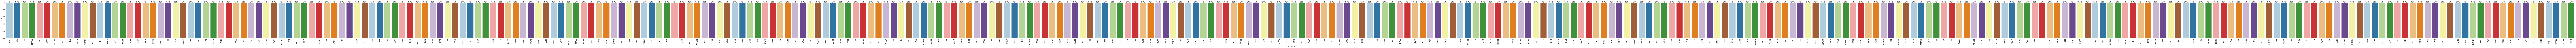

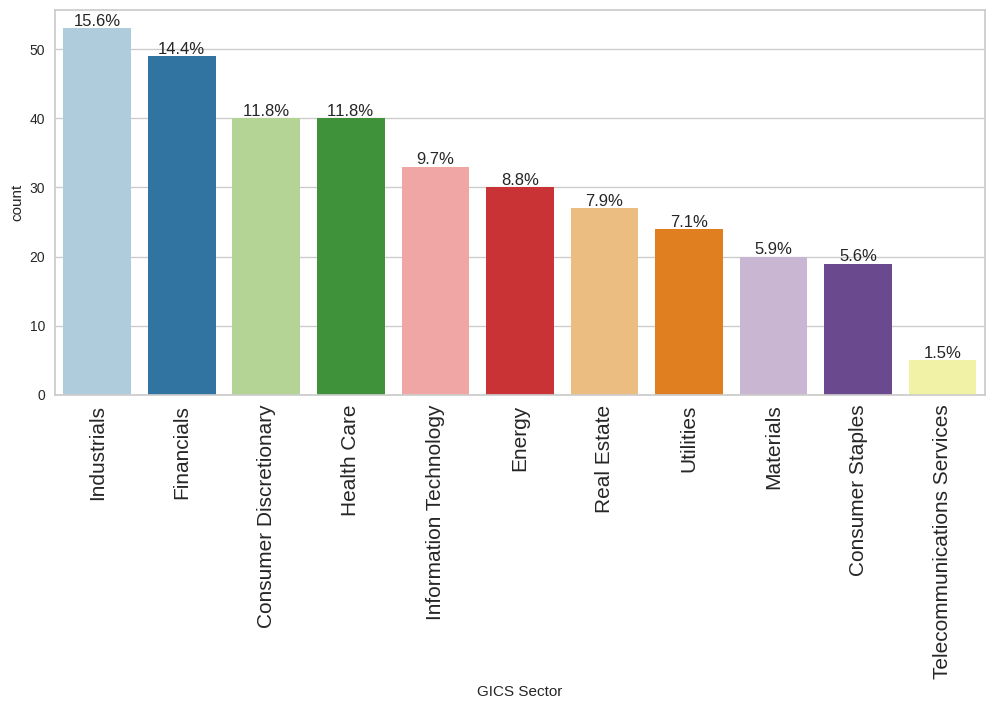

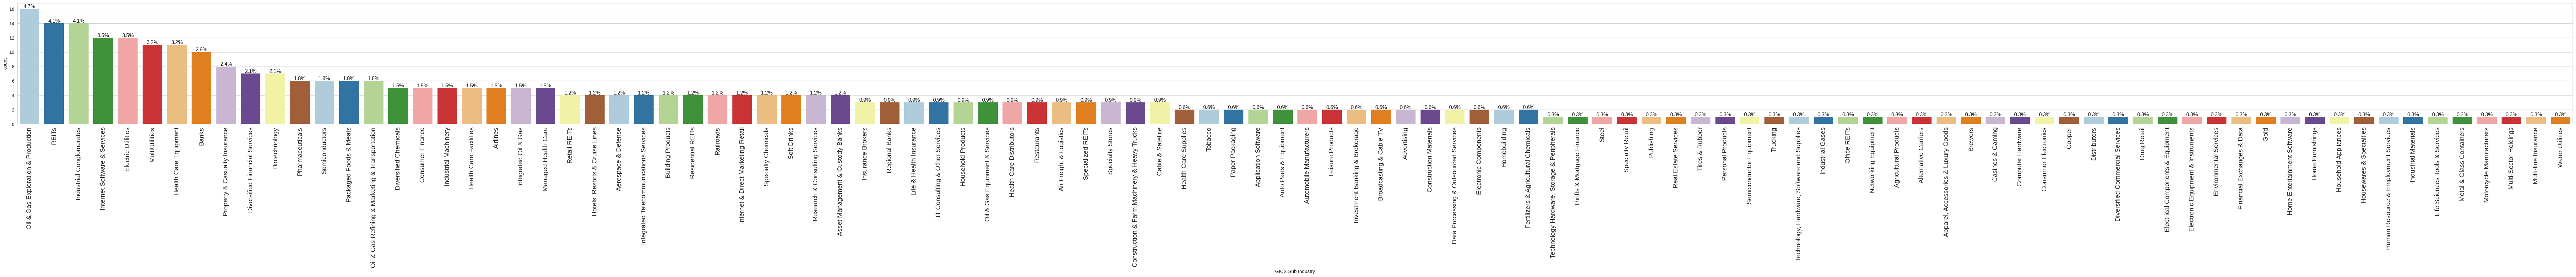

In [ ]:
for item in cat_col:
    labeled_barplot(df, item)

### **Overview:**
#### 1 Industrials sector consists of 15.6%, Financials 14.4%, and Consumer discretionary and healthcare both 11.8%. It is observed that the dataset is diversed in sectors, which is a good thing.
#### 2 Oil and gas exploration consists of 4.7%, REITS and Industrial Conglometers 4.1%.

## 2 Bivariate Analysis

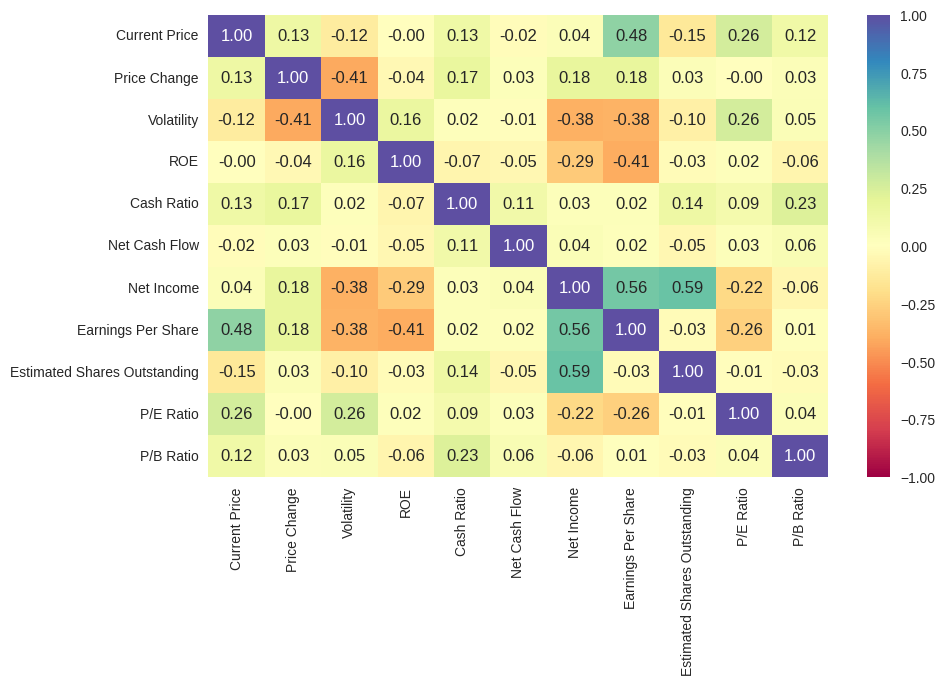

In [ ]:
# correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Overview:**
#### 1 The correlation between Earnings per share and current price is 48%.
#### 2 Earnings per share and net income is 56%, while the correlation between earnings per share and volatility is -38% and with P/E ratio is -26%, and with ROE is -0.41%.

# Questions

## Question 1
### What does the distribution of stock prices look like?

#### The distribution of stock price is skewed to the right, due to some outliers, which represent high prices of some company's stocks.

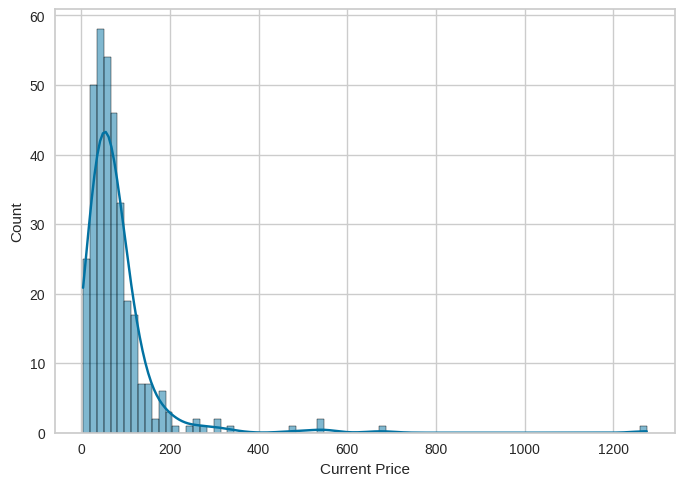

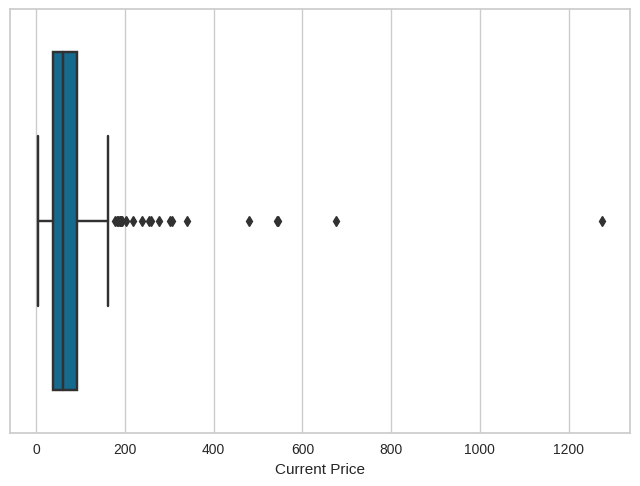

In [ ]:
sns.histplot(df,x=df['Current Price'],kde=True)
plt.show()
sns.boxplot(df,x=df['Current Price'])
plt.show()

## Question 2
### The stocks of which economic sector have seen the maximum price increase on average?

#### the stocks in the Health Care have seen the highest average price increase

In [ ]:
df.groupby(df['GICS Sector'])['Price Change'].mean().sort_values()

GICS Sector
Energy                        -10.228289
Utilities                       0.803657
Industrials                     2.833127
Financials                      3.865406
Materials                       5.589738
Consumer Discretionary          5.846093
Real Estate                     6.205548
Telecommunications Services     6.956980
Information Technology          7.217476
Consumer Staples                8.684750
Health Care                     9.585652
Name: Price Change, dtype: float64

## Question 3
### How are the different variables correlated with each other?

#### The correlation between Earnings per share and current price is 48%. Earnings per share and net income is 56%, while the correlation between earnings per share and volatility is -38% and with P/E ratio is -26%, and with ROE is -0.41

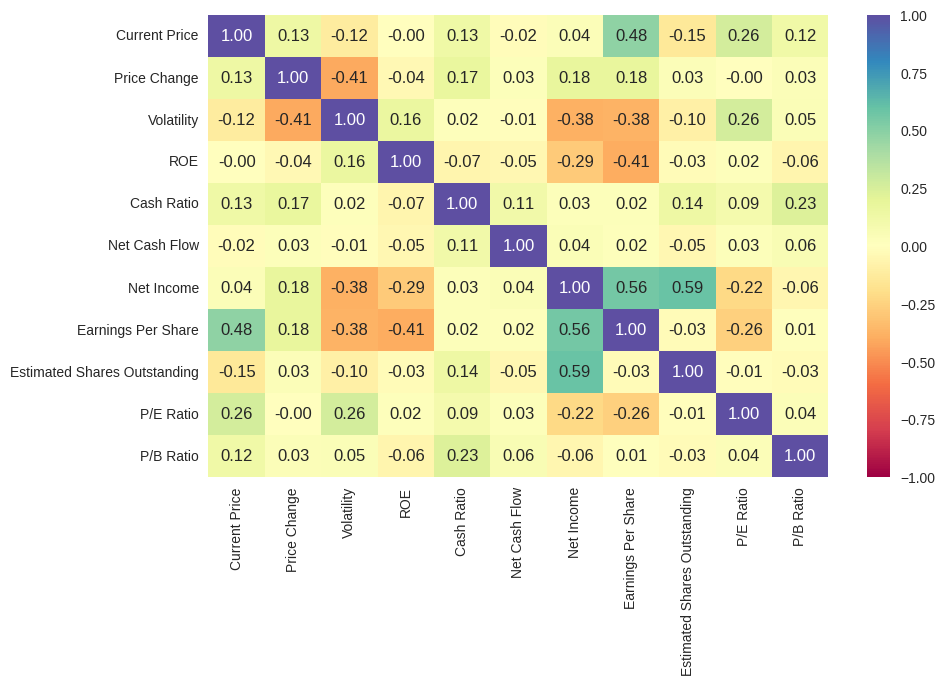

In [ ]:
# correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Question 4
### Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

#### Information Technology companies have higher cash ratio of around 150 on average. Then Telecommunication services with cash ratio of around 110 on average. On the other hand, Utilities have the lowest cash ratio

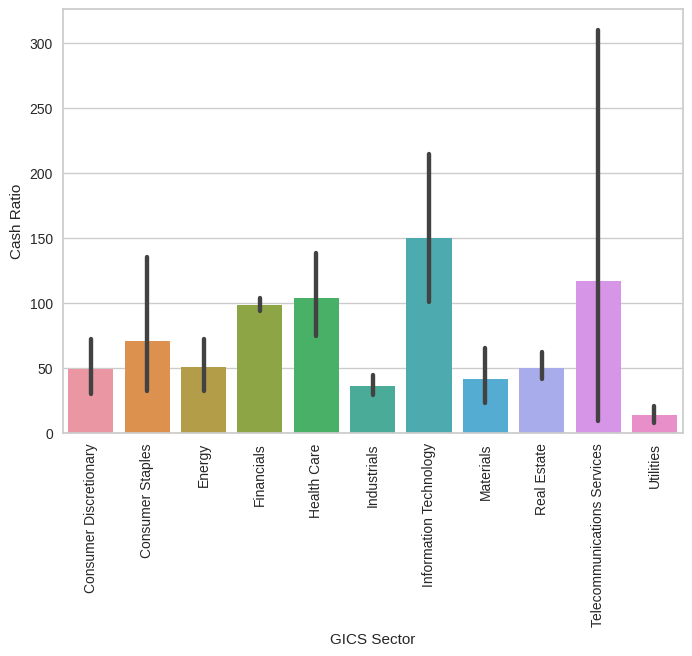

In [ ]:
sns.barplot(df,x=df['GICS Sector'],y=df['Cash Ratio'])
plt.xticks(rotation=90)
plt.show()

## Question 5
### P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

#### P/E ratio is the highest in energy (around 70), then IT, health care and real estate. On the other hand, telecommunication services have the lowest P/E ratio

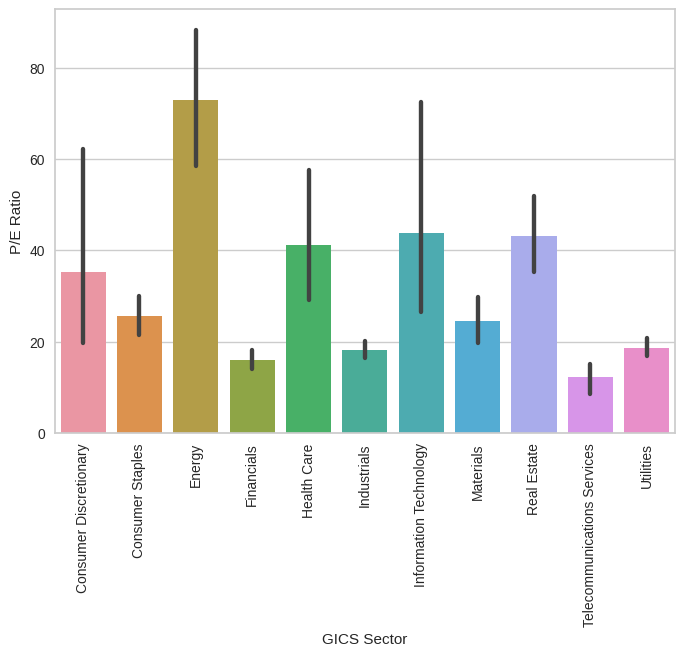

In [ ]:
sns.barplot(df,x=df['GICS Sector'],y=df['P/E Ratio'])
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

##### Duplicate value check
##### Missing value treatment
##### Outlier check
##### Feature engineering (if needed)
##### Any other preprocessing steps (if needed)

### 1 Outliers Check

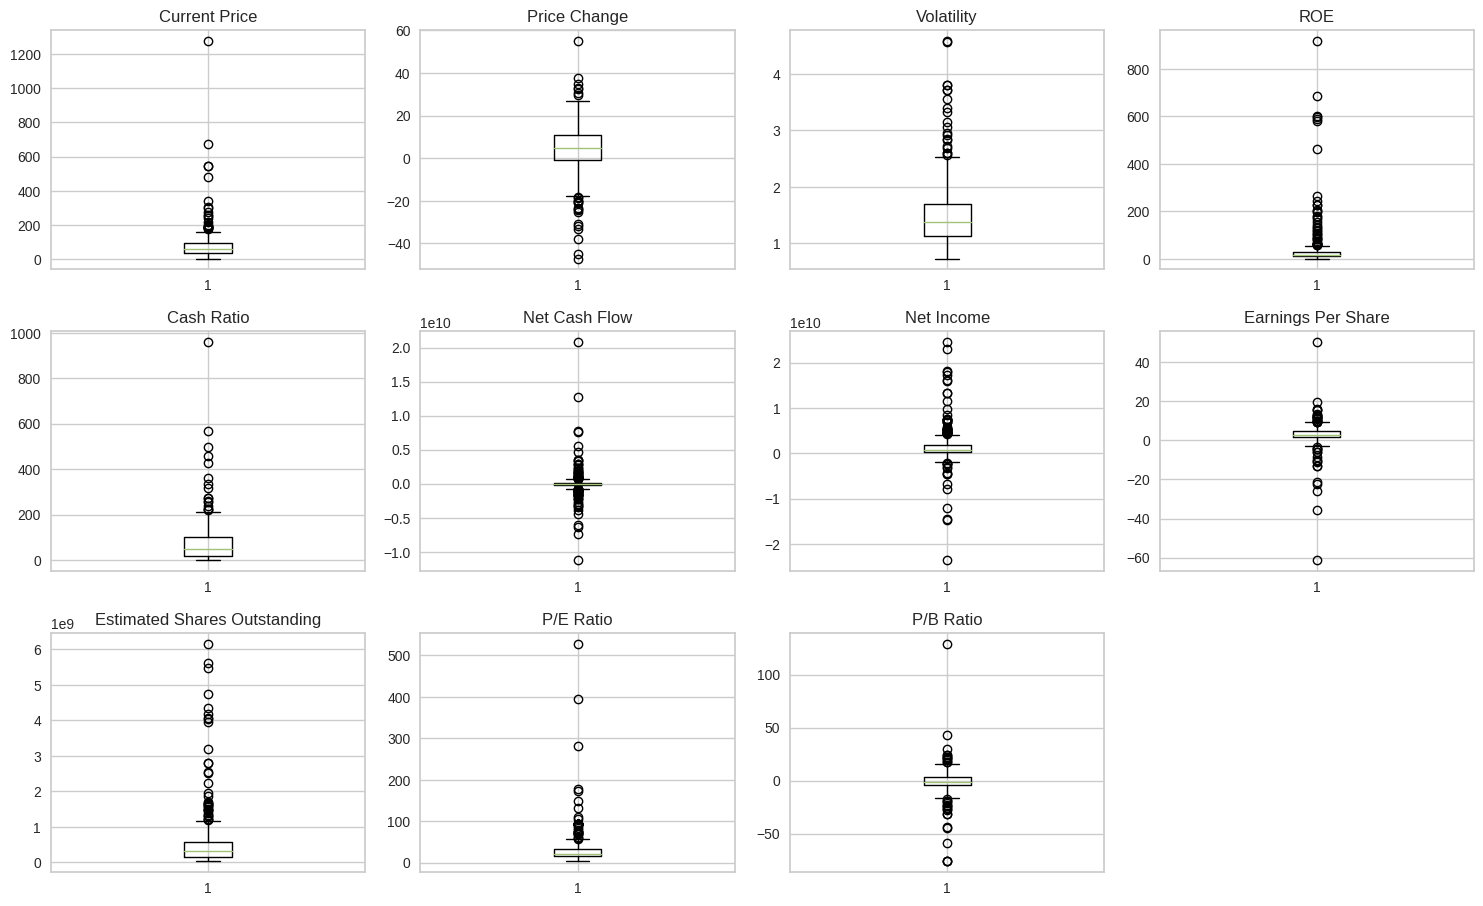

In [ ]:
# outlier detection using boxplot

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### **Overview:**
#### there are observed outliers, however we will keep them as they might have a significant value

### 2 Scaling

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


# K-means Clustering

### 1 Iteriation of 10ks & Elbow Analysis

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2659355306126447
Number of Clusters: 4 	Average Distortion: 2.1871473823863568
Number of Clusters: 5 	Average Distortion: 2.109438929371255
Number of Clusters: 6 	Average Distortion: 2.071320990534166
Number of Clusters: 7 	Average Distortion: 2.018463656332171
Number of Clusters: 8 	Average Distortion: 1.9739936265457114
Number of Clusters: 9 	Average Distortion: 1.9156966711611063
Number of Clusters: 10 	Average Distortion: 1.8537378772438697


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

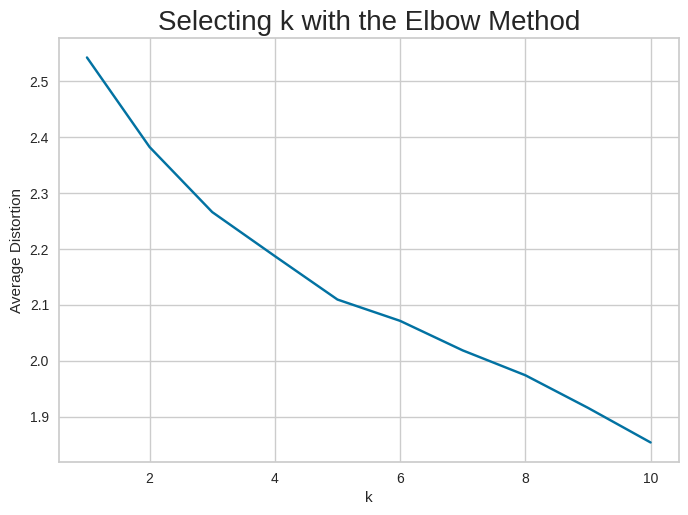

In [ ]:
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

#### Appropriate k could be 4,5,or 8

### 2 Silhouette score

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4622784487377946
For n_clusters = 5, silhouette score is 0.3735020122633041
For n_clusters = 6, silhouette score is 0.40881992708107373
For n_clusters = 7, silhouette score is 0.37445794650617226
For n_clusters = 8, silhouette score is 0.39939981951033054
For n_clusters = 9, silhouette score is 0.4127868263533936
For n_clusters = 10, silhouette score is 0.15547865998051164


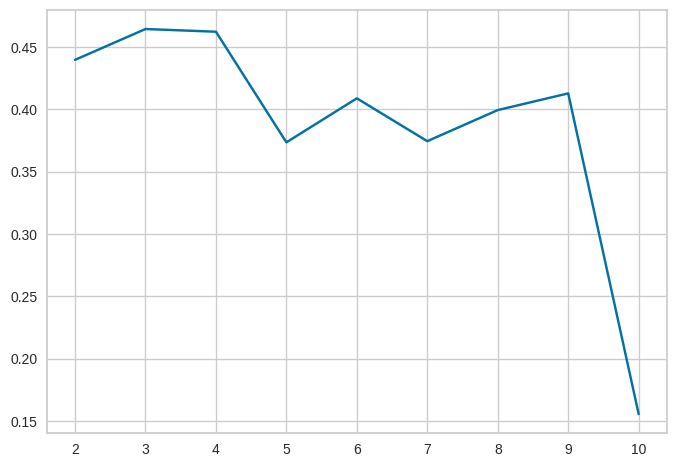

In [ ]:
sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

### 3 Silhouette Coefficient

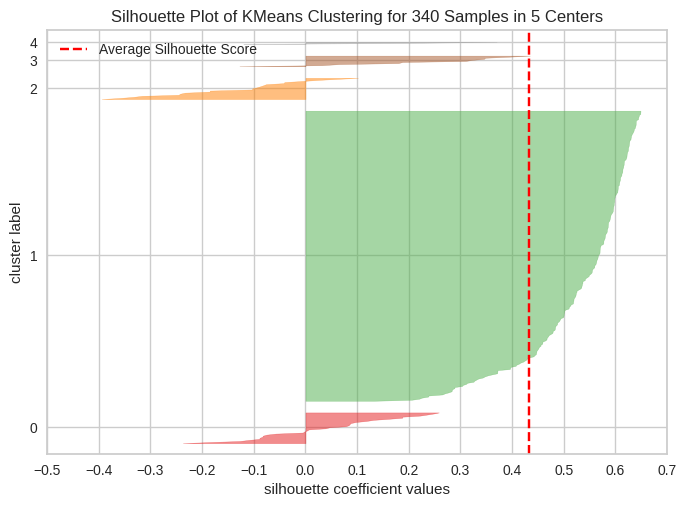

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients (k = 5)
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

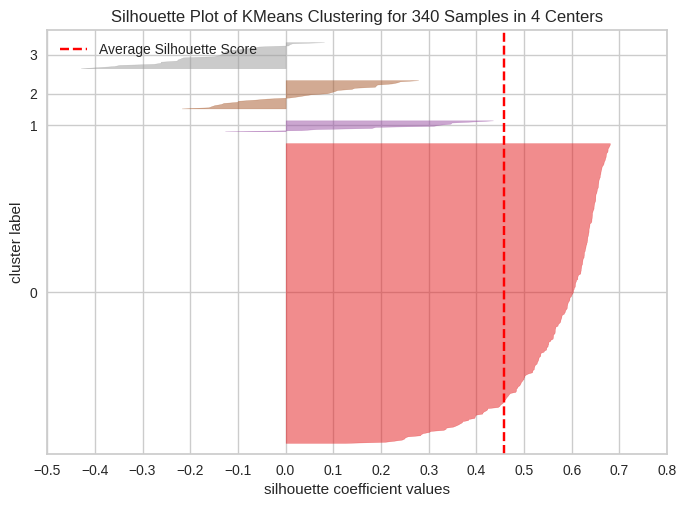

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients (k = 4)
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

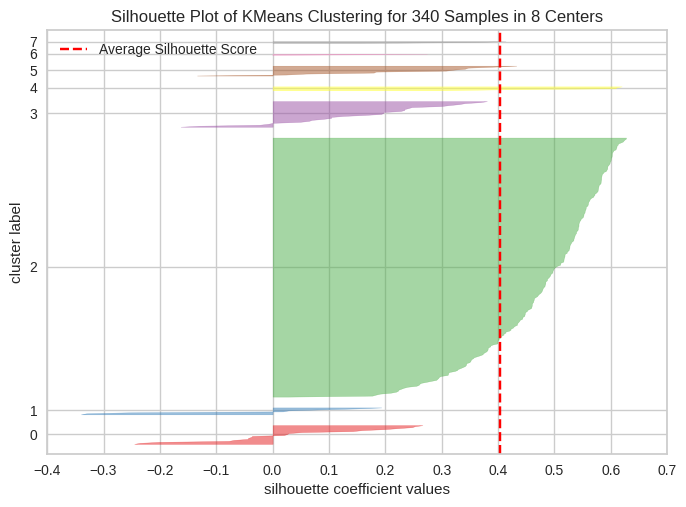

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients (k = 8)
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### 4 Select final model

In [ ]:
# the optimal k is 5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [ ]:
df.head()

,Ticker Symbol,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,AAL,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,4
1,ABBV,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,4
2,ABT,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,4
3,ADBE,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,4
4,ADI,Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,0


### 5 Cluster Profiling

In [ ]:
#group dataset by kmeans cluster labels
cluster_profile = df.groupby("K_means_segments").mean()

#add counts for number of stocks in each cluster
cluster_profile["Count"] = (
    df.groupby("K_means_segments")["Current Price"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
K_means_segments,,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,24
1,41.373681,-14.849938,2.596790,27.285714,64.457143,34462657.142857,-1293864285.714286,-2.459714,450100420.905143,61.563930,2.476202,35
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,9
4,72.768128,5.701175,1.359857,25.598456,52.216216,-913081.081081,1537660934.362934,3.719247,436114647.527683,23.473934,-3.374716,259


In [ ]:
# print the tickers in each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the tickers are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["Ticker Symbol"].unique().to_list())
    print()

In cluster 4, the tickers are present:
['AAL', 'ABBV', 'ABT', 'ADBE', 'ADM', 'AEE', 'AEP', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG', 'ALB', 'ALK', 'ALL', 'AMAT', 'AME', 'AMG', 'AMP', 'AMT', 'AN', 'ANTM', 'AON', 'APH', 'ATVI', 'AVB', 'AVGO', 'AWK', 'AXP', 'BA', 'BAX', 'BBT', 'BCR', 'BK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'CAT', 'CB', 'CBG', 'CCI', 'CCL', 'CFG', 'CHD', 'CHRW', 'CI', 'CINF', 'CMA', 'CME', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'CSX', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DGX', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DLPH', 'DLR', 'DNB', 'DOV', 'DPS', 'DUK', 'DVA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EMN', 'EQR', 'ES', 'ESS', 'ETFC', 'ETN', 'ETR', 'EXC', 'EXPD', 'EXPE', 'EXR', 'FAST', 'FBHS', 'FE', 'FIS', 'FISV', 'FLIR', 'FLR', 'FLS', 'FMC', 'FRT', 'GD', 'GGP', 'GLW', 'GM', 'GPC', 'GRMN', 'GT', 'GWW', 'HAS', 'HBAN', 'HCA', 'HCN', 'HCP', 'HIG', 'HOG', 'HON', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'IDXX', 'IFF', 'IP', 'IPG', 'IRM', 'ITW', 'IVZ

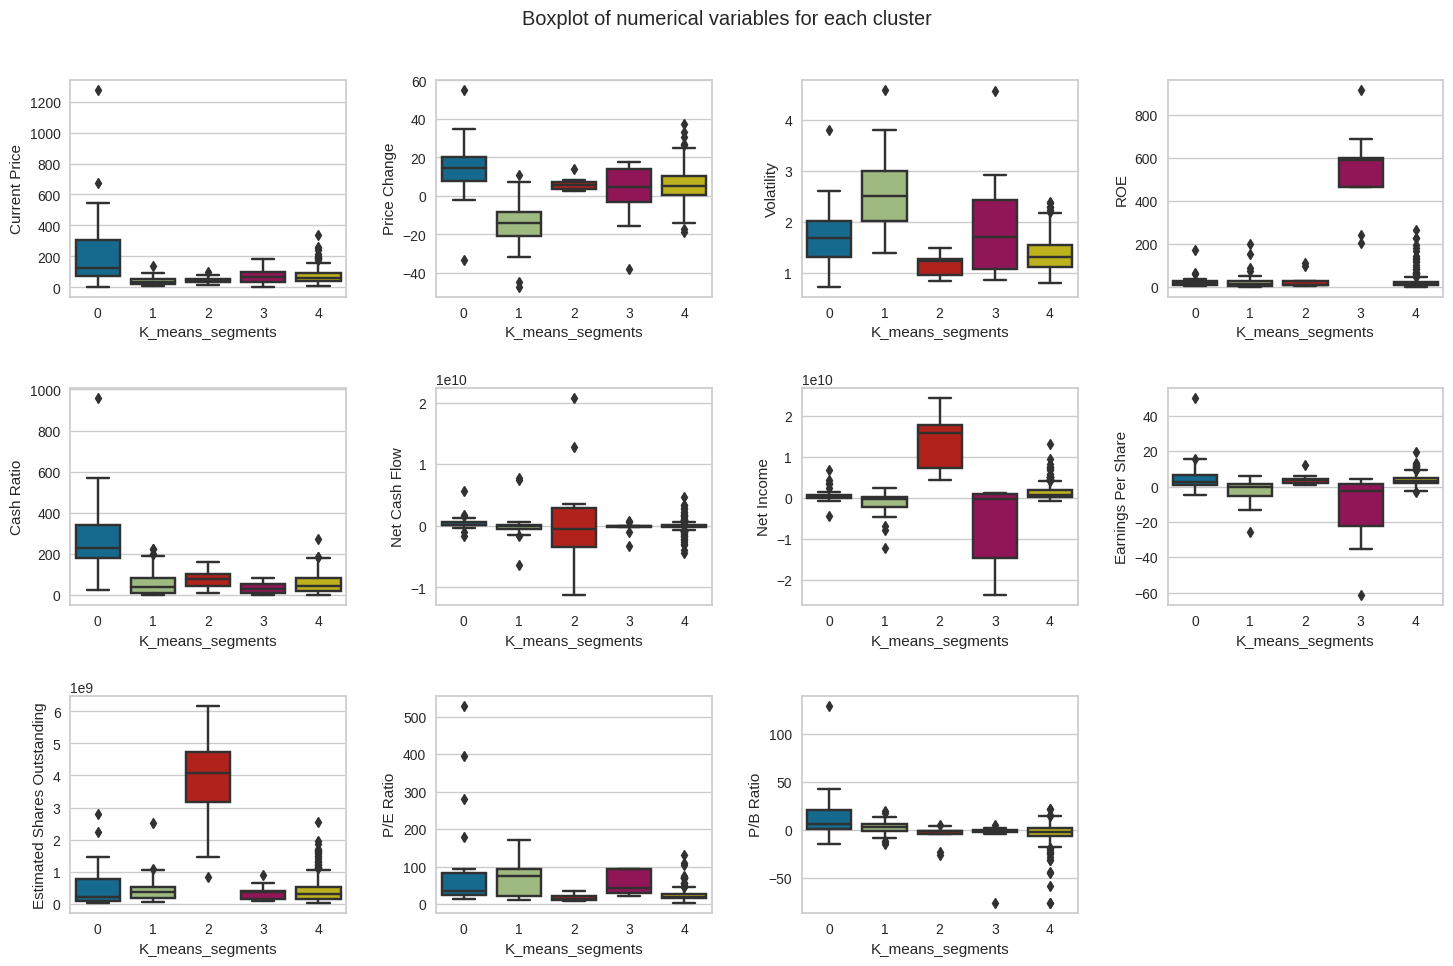

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

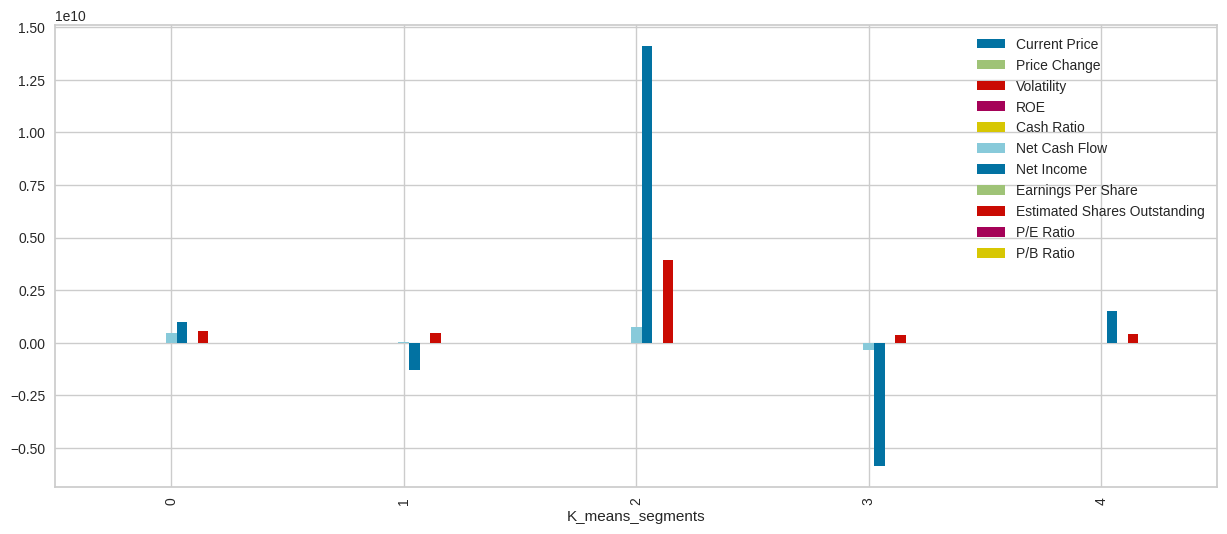

In [ ]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

### 6 Insights on K Means
#### 1 Cluster 0: High ticket companies
#### this cluster consists of companies that have the highest average current price, and high positive price change, with moderate volatility. Their cash ratio is high.

#### 2 Cluster 1: Bad performers
#### this cluster consists of companies with the most negative price change, and highest volatility.

#### 3 Cluster 2: Stable Companies
#### this cluster consists of companies which have a stable change in their price and low volatility and highest net income. They also have the highest market capitalization.

#### 4 Cluster 3: Risky companies
#### this cluster consists of companies which have fluctating price change with fluctuating volatility. They have the highest ROE. Yet, their net income & EPS can drastically fall.

#### 5 Cluster 4: Moderate companies
#### this cluster consists of companies that are moderate in all aspects.

# Hierarchical Clustering

### 1 Checking Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


#### explore different linkage methods with Euclidean distance only

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


#### Cophenetic correlation is maximum with Euclidean distance and average linkage

### 2 Checking Dendrograms

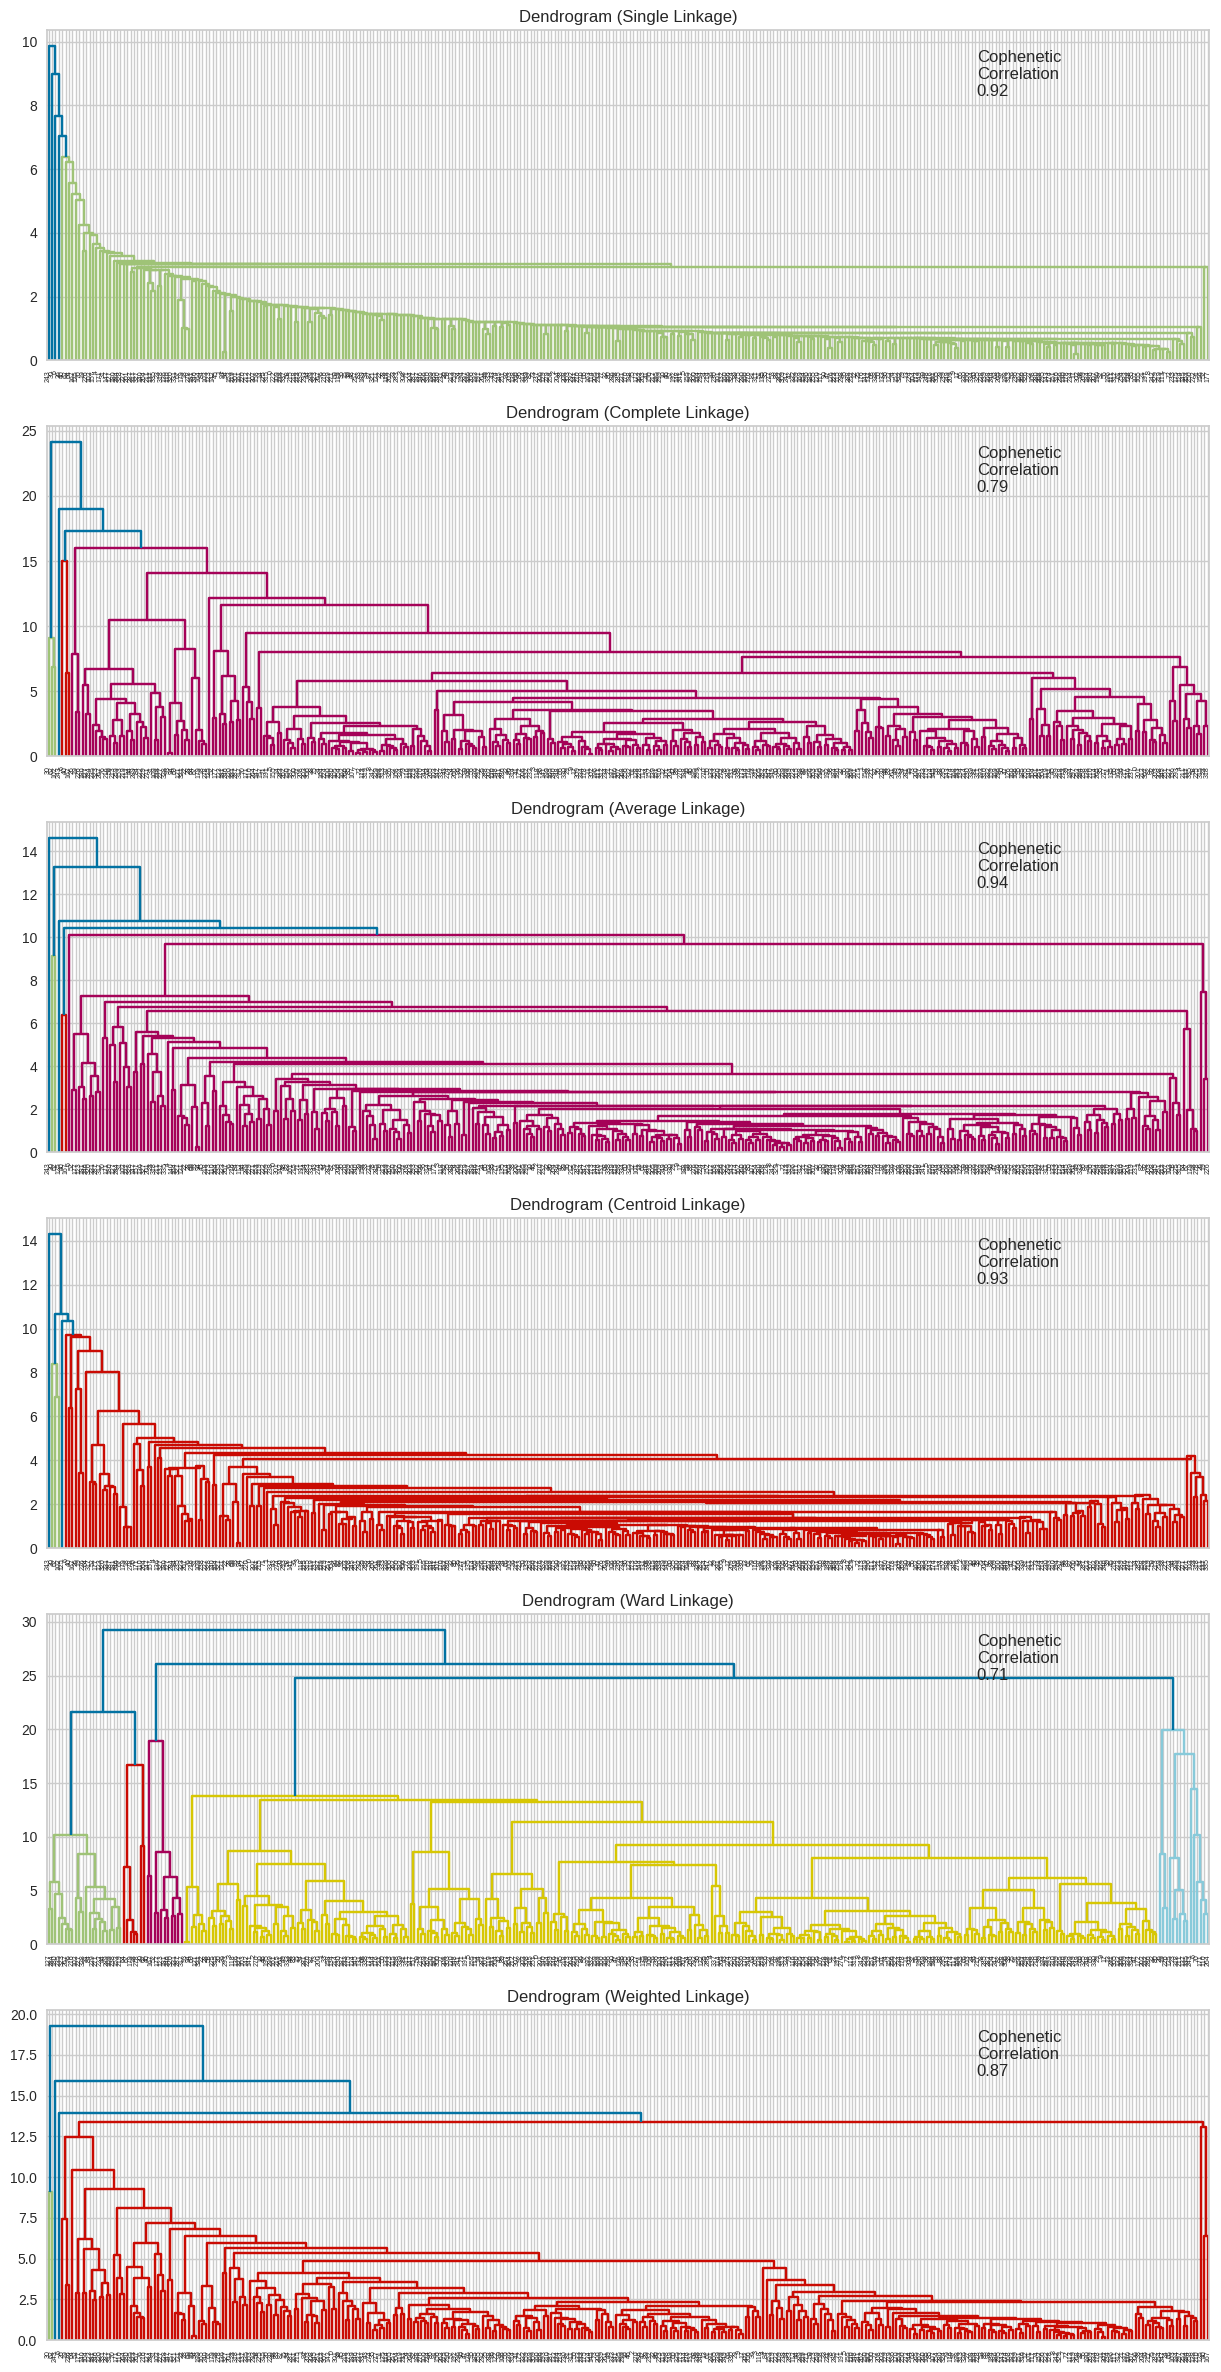

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.923227
1,complete,0.787328
2,average,0.942254
3,centroid,0.931401
4,ward,0.710118
5,weighted,0.869378


Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).

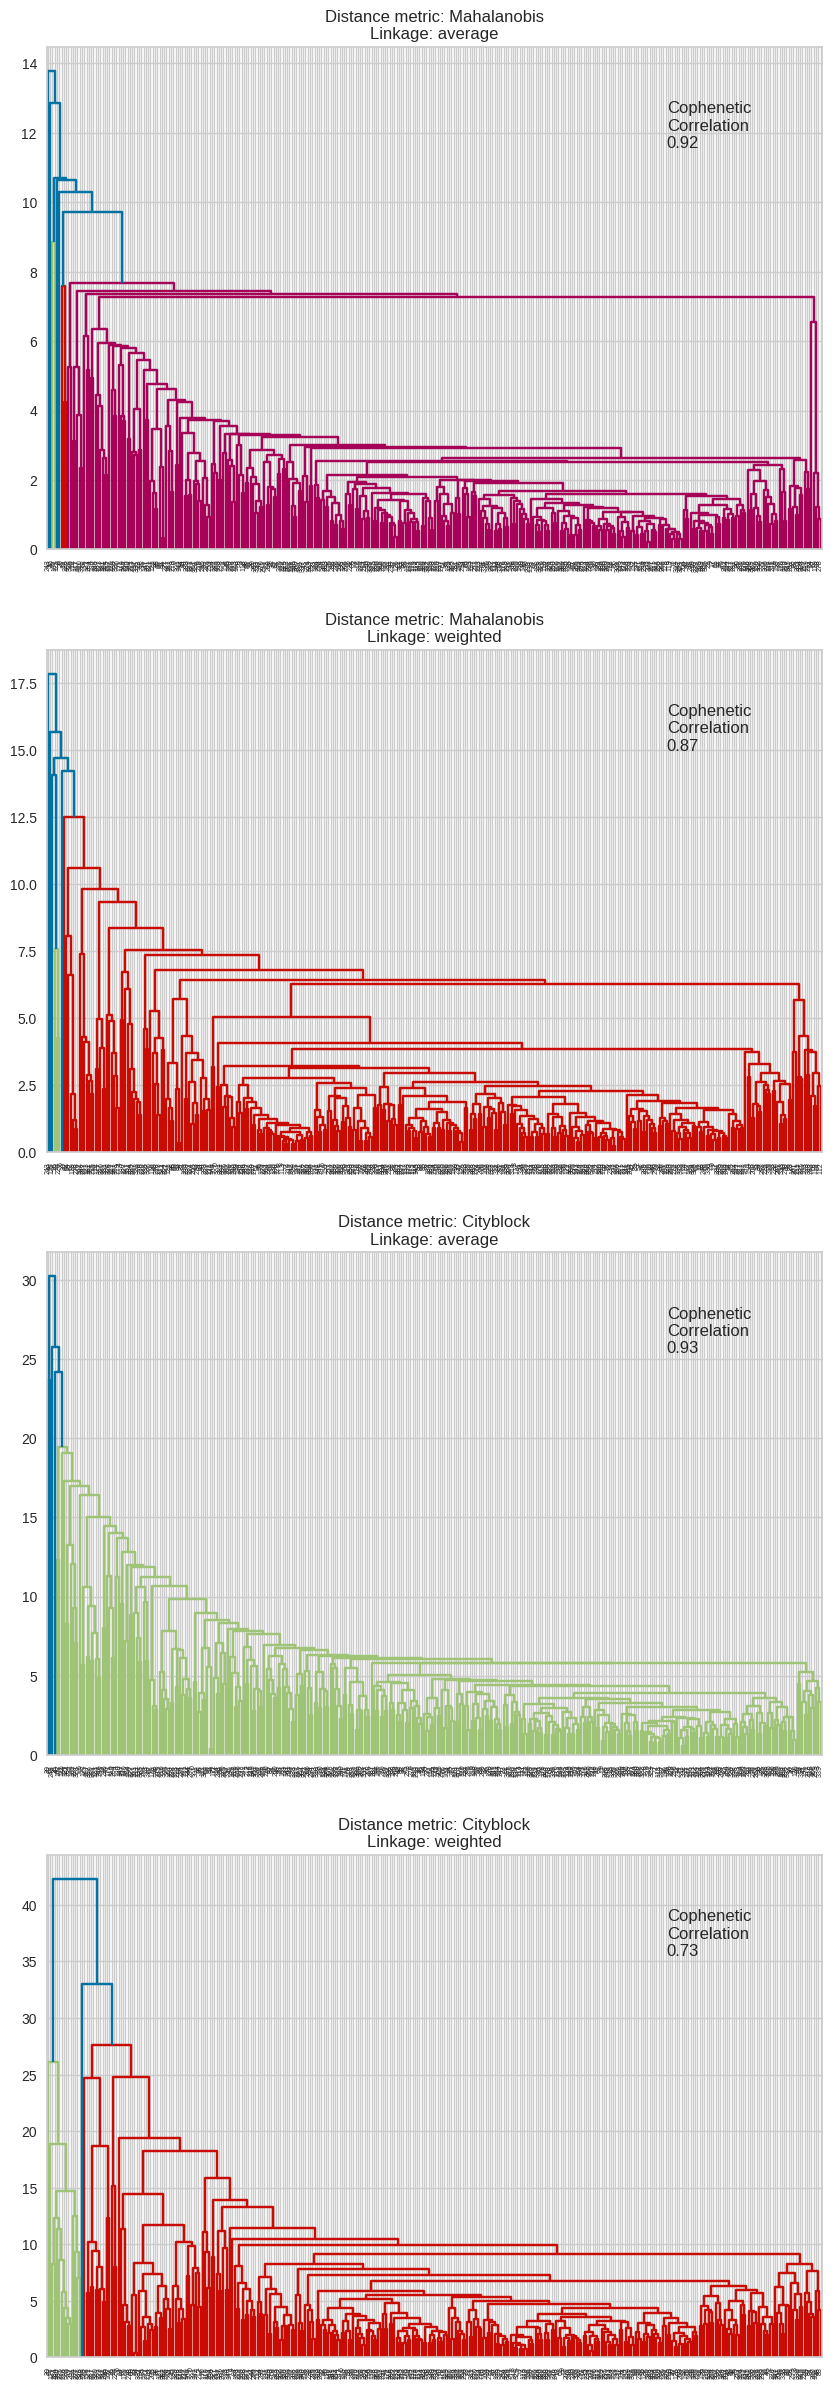

In [ ]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

## Creating Final Model

In [56]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [57]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [58]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [59]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current Price"].count().values
)

In [60]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,1.620690,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,0.000000,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,2.000000,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,3.701754,285


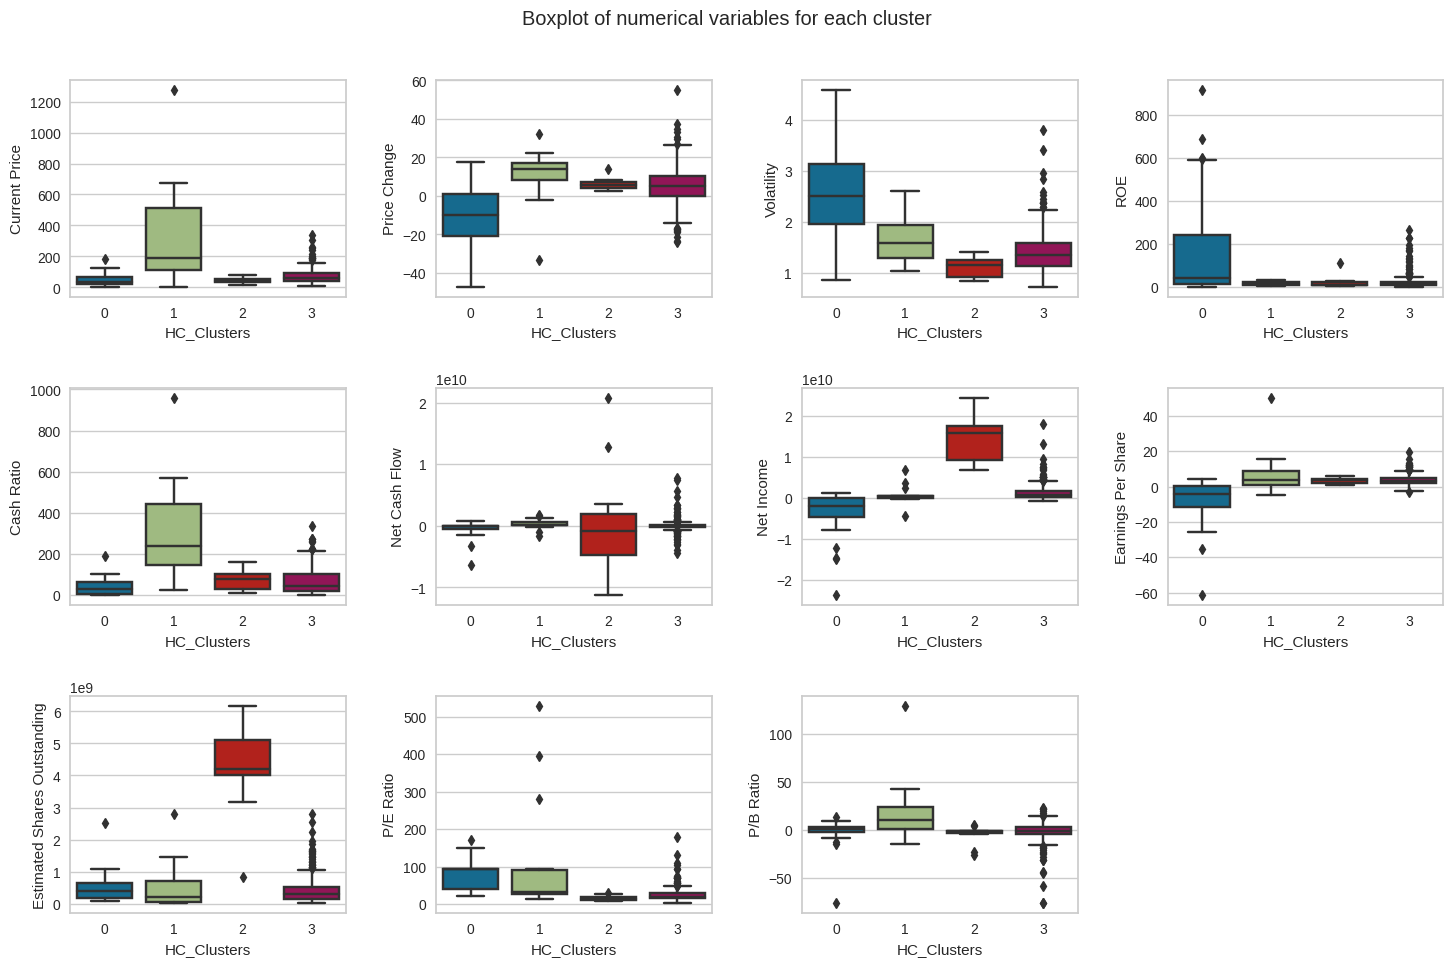

In [61]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Insights on Hierarchial clustering
#### 1 Cluster 0: Losers
#### this cluster consists of companies that are small in size,  with negative price change and high volatility, however, their ROE is considerably good.
#### 2 Cluster 1: Best performers
#### this cluster consists of companies that are expensive, making profits with low volatility. Their cash ratio is the highest.
#### 3 Cluster 2: Lowest risk
#### this cluster consists of of companies with the lowest risk and highest net income. and they have the greatest shares outstanding.
#### 4 Cluster 3: Unpredictable stocks
#### this cluster represents the companies that are witnessing high ups and downs.

# K-means vs Hierarchical Clustering

K-means vs Hierarchical Clustering
You compare several things, like:

Which clustering technique took less time for execution?

Which clustering technique gave you more distinct clusters, or are they the same?

How many observations are there in the similar clusters of both algorithms?

How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**Which clustering technique took less time for execution?**

Kmean took around 1 sec while dendogram took around 30 seconds.


**Which clustering technique gave you more distinct clusters, or are they the same? How many observations are there in the similar clusters of both algorithms?**

Both algorithms give similar clusters, with a single cluster of a majority of the stocks and the remaining four clusters containing 7-29 stocks. The clusters were good at grouping risky stocks.

**How many clusters are obtained as the appropriate number of clusters from both algorithms?**

we used 5 clusters in kmeans and 4 in hc. Both had  sufficient observations in each to reasonably differentiate which  type of stock is representative of the cluster

**Differences or similarities in the cluster profiles from both the clustering techniques**

Both algorithms yielded similar clusters based on the outliers within the 11 variables


**Actionable Insights and Recommendations**

Clustering is a good vehicle for the company to identify certain companies by

their risk and return behavior.

The company can use clustering to align its investors appetite of risk and their financial goals.

More financial ratios can be added to the dataset.